# Web Scrapping Project - Top GitHub Repositories in Selected Topics

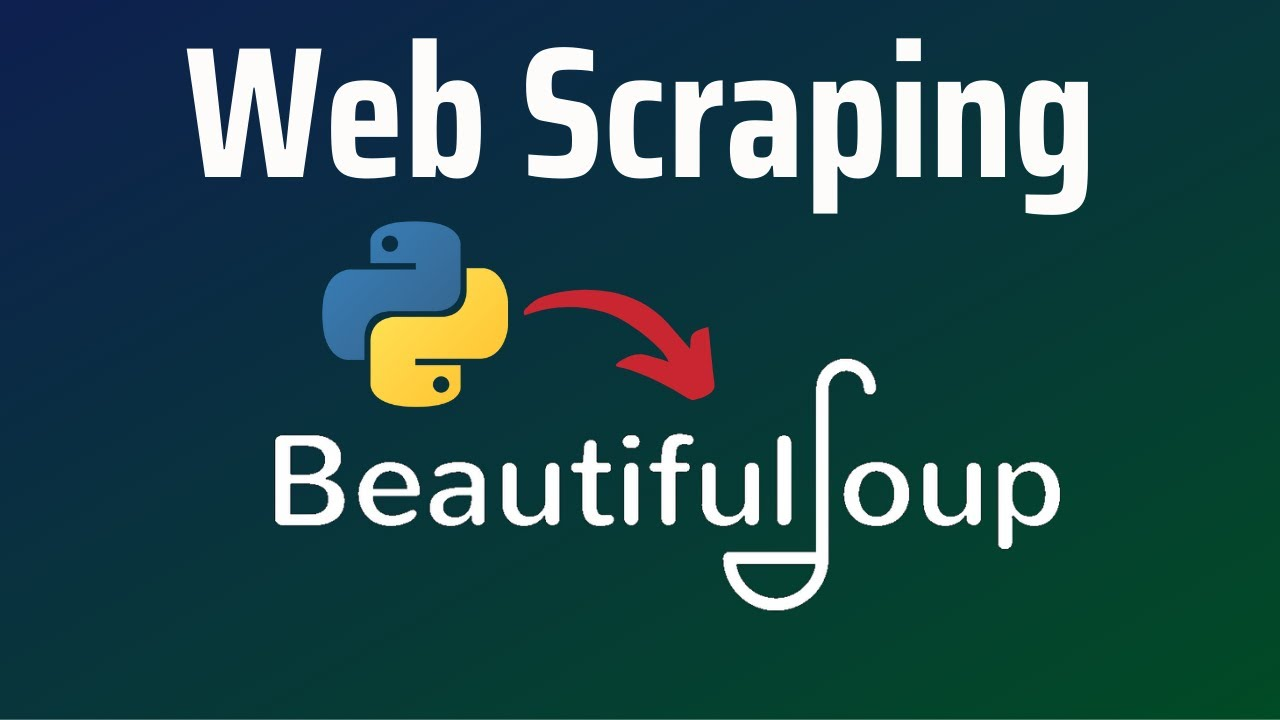


    
    


### About Web Scrapping 

`Web scraping` is a data extraction technique used to gather information from websites programmatically. The provided Python code showcases a web scraping application focused on GitHub topics and repositories.
    
    
### Introduction about Github
`GitHub` is a web-based platform that provides version control and collaboration tools for software development. It facilitates code sharing, collaboration, and project management through features like `repositories`, pull requests, and issue tracking. Developers use GitHub to manage and track changes in their code, making it a central hub for open-source projects and collaborative coding effort.


        This project utilizes libraries such as requests for fetching HTML, BeautifulSoup for parsing, and Pandas for data manipulation. The script extracts and organizes GitHub topic and repository details, saving the information into structured CSV files. This approach is valuable for automating data collection from websites for various purposes.

Here are the steps we would follow:
- We're going to scrape https://github.com/topics
- We'll get a list of topics. For each topic,we'll get topic title, topic page URL, and topic description 
- For each topic, we'll get the top 10 repositories in the topic from the topic page 
- For each repository, we'll grab the repo name, username, stars, repo URL
- For each topic we'll create a CSV file in the following format 
```
    Repo name, Username, Stars, Repo URL 
     mrdoob,threejs,96900,https://github.com/mrdoob/three.js	
    pmndrs,react-three-fiber,250000,https://github.com/pmndrs/react-three-fiber	
```
       


### Packages Used:
    
    1. Requests — For downloading the HTML code from the IMDB URL
    2. BeautifulSoup4 — For parsing and extracting data from the HTML string
    3. Pandas — to gather my data into a dataframe for further processing


## Scrape the list of topics from Github

Explain how you do it 

- use requests to download the page
- user BS4 to parse and extract information 
- convert to a Pandas dataframe 

Let's write a function to download the page

### Lets begin:

### Download the webpage using requests

#### What is requests
`Requests` is a Python HTTP library that allows us to send `HTTP requests` to servers of websites, instead of using browsers to communicate the web.

    We use pip, a package-management system, to install and manage softwares. Since the platform we selected is Binder, we would have to type a line of code !pip install to install requests. You will see lots codes of !pip when installing other packages.

    When we attempt to use some prewritten functions from a certain library, we would use the import statement. e.g. When we would have to type import requests after installation, we are able to use any function from requests library.

In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import os

def get_page(url):
    # Download the page
    response = requests.get(url)
    #Check successful response 
    #parse using beautiful soup is response is successful 
    if 200 <= response.status_code <= 299:
        page_contents = response.text
        doc = BeautifulSoup(page_contents, 'html.parser')
        return doc
    else:
        raise Exception(f"Unable to fetch the given page {url}")

C:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


A function that retrieves the HTML content of a given URL using the requests library. It checks for a successful response and returns a BeautifulSoup object for further parsing.

The successful response is checked using .status_code function provided by the requests library. If the send request is successful then the value of status_code should lie anywhere between 200 and 299. 

A beautiful soup object is created which we will use throughout the project to parse the website

In [2]:
doc=get_page("https://github.com/topics")

In [3]:
type(doc)

bs4.BeautifulSoup

Let's create some helper functions to parse information 

#### What is HTML?

Before we dive into how to inspect HTML, we should know the basic knowledge about HTML.

    The HyperText Markup Language, or HTML is the standard markup language for documents designed to be displayed in a web browser. It can be assisted by technologies such as Cascading Style Sheets and scripting languages such as JavaScript.



#### An HTML tag comprises of three parts:

    1 Name: (html, head, body, div, etc.) Indicates what the tag represents and how a browser should interpret the information inside it.
    2. Attributes: (href, target, class, id, etc.) Properties of tag used by the browser to customize how a tag is displayed and decide what happens on user interactions.
    3. Children: A tag can contain some text or other tags or both between the opening and closing segments, e.g., <div>Some content</div>.
#### Common tags and attributes

##### Tags in HTML

    There are around 100 types of HTML tags but on a day to day basis, around 15 to 20 of them are the most common use, such as <div> tag, <p> tag, <section> tag, <img> tag, <a> tags.

    Of many tags, I wanted to highlight <a> tag, which can contain attributes such as href (hyperlink reference), because <a> tag allows users to click and they would be directed to another site. That's why the name of <a> tag is anchor.

##### Attributes
    Each tag supports several attributes. Following are some common attributes used to modify the behavior of tags

- id
- style
- class
- href (used with <a>)
- src (used with <img>tag)

    What we can do with **a BeautifulSoup object** is to get **a specifc types of a tag in HTML** by calling the name of a tag, as shown in code cell below.

Here, we use the find() function of BeautifulSoup to find the first <title> tag in the HTML document and display its content

In [4]:
title=doc.find('title')
title

<title>Topics on GitHub · GitHub</title>

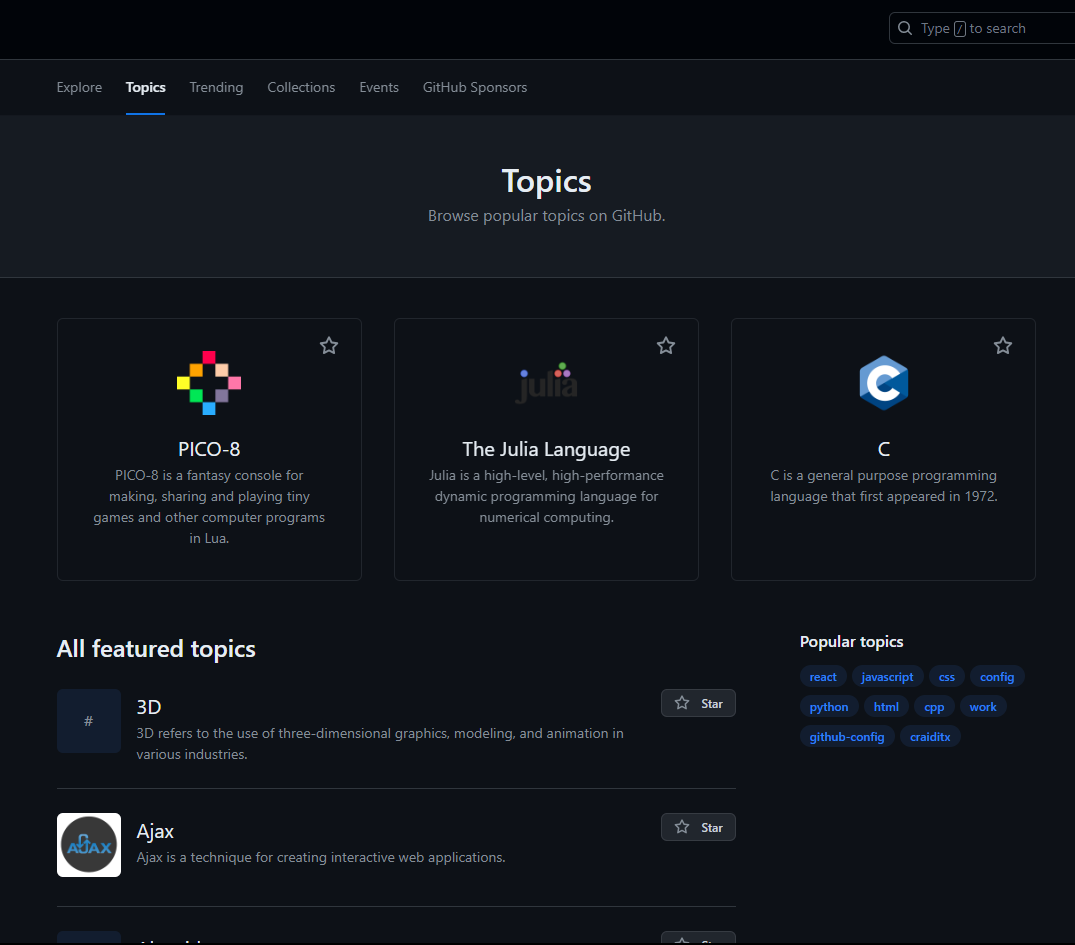

### GitHub Topics 
                                                         
    Now we will use 'BeautifulSoup' to extract The names, URLs of the top 30 topics 
                                                        

In [5]:
topic_titles = []
topic_descs = []
topic_urls = []
title_tags = doc.find_all('p', class_="f3 lh-condensed mb-0 mt-1 Link--primary")
for tag in title_tags:
    topic_titles.append(tag.text)

desc_tags = doc.find_all('p', class_="f5 color-fg-muted mb-0 mt-1")
for tag in desc_tags:
    topic_descs.append(tag.text.strip())

link_tags = doc.find_all('a', class_="no-underline flex-1 d-flex flex-column")
base_url = "https://github.com"
for tag in link_tags:
    helper_tag=tag['href']
    topic_urls.append(base_url + helper_tag)


In [6]:
!pip install pandas --quiet --upgrade  
import pandas as pd

In [7]:
topics_dict={
        'title': topic_titles,
        'description': topic_descs,
        'url': topic_urls
}
topics_dict
topics_df = pd.DataFrame(topics_dict)  #Here we convert the dictionary into a Pandas DataFrame
topics_df.to_csv('topics.csv', index=None)

`parse_page(doc)`: This function extracts information about GitHub topics from the parsed HTML document. It collects data such as `topic titles`, `descriptions`, and constructs `topic URLs`and returns a dictionary of lists containing the above data.The other chunck of code saves the data in a dictionary and then a dataframe is created where the dictionary is stored in dataframe form.

This df is at the end saved as a csv file

##### What is Pandas?

    Pandas is a software library written for the Python programming language for data manipulation and analysis.
    In particular, it offers data structures and operations for manipulating numerical tables and time series.

##### What is a DataFrame?

    A Pandas DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.
    DataFrame makes it easier for us to work with tablular data and analse it.



Now, Let us check the length of the Dataframe that we have created which contains the `topic name` `description` and `url`

In [8]:
len(topics_df)

30

We can see that the DataFrame consists of 30 items, that is equal to the number of topics that we have on the page `Github topics`.

Therefore, we can be sure that we have extracted the complete information that we had intended to.

Now the next step is to scrape each website obtained in the URL and parse the information of top 10 repositories in each topic and ultimately store it in a `pandas df`

In [9]:
topics_df

,title,description,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source platform for buildin...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


#### Next Steps

Now, we will go into each individual topic's page and extract the rest of the required information

Let's start with extracting all the information for the topic 3D, which is the first topic in our list

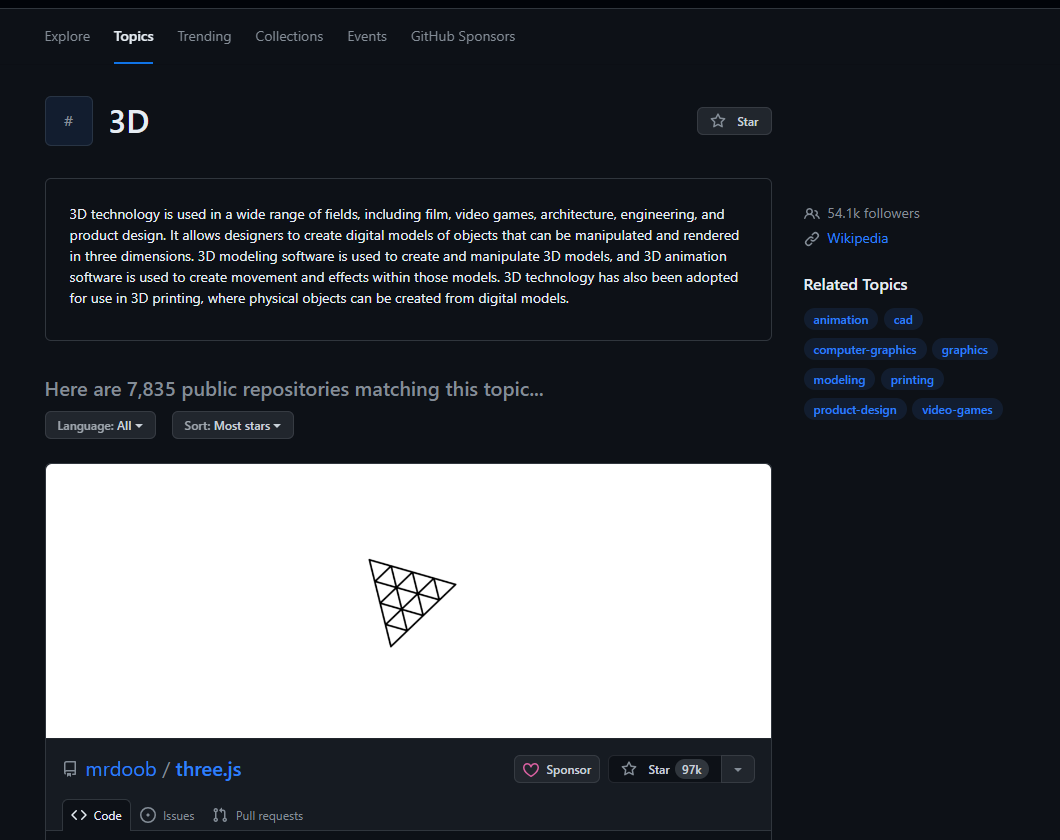

In [10]:
topic_urls[0]

'https://github.com/topics/3d'

In [11]:
topic_page = topic_urls[0]  #To get information from the 1st movie among Most Popular Movies
response = requests.get(topic_page)
response.status_code

200

In [12]:
len(response.text)

488781

Now, we will use `BeautifulSoup` to extract the required info from the page.

In [13]:
doc2 = BeautifulSoup(response.text, 'html.parser')

##### Repository name 

In [14]:
h3_tags=doc2.find_all('h3',class_="f3 color-fg-muted text-normal lh-condensed")
repo_names = [tag.find_all('a')[1].text.strip() for tag in h3_tags[:10]]

###### User name

In [15]:
user_names = [tag.find_all('a')[0].text.strip() for tag in h3_tags[:10]]

##### Number of stars

In [16]:
star_tags = doc2.find_all('span', {'id': "repo-stars-counter-star"})
stars_set = [int(float(tag.text[:-1]) * 1000) if tag.text[-1] == 'k' else int(tag.text) for tag in star_tags[:10]]           

##### Repo URL

In [17]:
repo_URLS = [f"https://github.com/topics{tag.find_all('a')[0]['href']}" for tag in h3_tags[:10]]

Now we have all the required information for the topic 3D. 

In [18]:
print("For the topic 3D, the dataframe is : ")
threeD_dict={
        'Repo name': repo_names,
        'User name': user_names,
        'Star count':stars_set,
        'URL': repo_URLS
}
threeD_df=pd.DataFrame(threeD_dict)
threeD_df

For the topic 3D, the dataframe is : 


,Repo name,User name,Star count,URL
0,three.js,mrdoob,97000,https://github.com/topics/mrdoob
1,react-three-fiber,pmndrs,25000,https://github.com/topics/pmndrs
2,libgdx,libgdx,22400,https://github.com/topics/libgdx
3,Babylon.js,BabylonJS,21900,https://github.com/topics/BabylonJS
4,tinyrenderer,ssloy,18700,https://github.com/topics/ssloy
5,3d-game-shaders-for-beginners,lettier,16600,https://github.com/topics/lettier
6,FreeCAD,FreeCAD,16500,https://github.com/topics/FreeCAD
7,aframe,aframevr,16000,https://github.com/topics/aframevr
8,cesium,CesiumGS,11500,https://github.com/topics/CesiumGS
9,blender,blender,10700,https://github.com/topics/blender


Now, we will write functions to combine what we have done above and get all the details at once for any given `topic` URL

In [19]:
import requests
import pandas as pd
from bs4 import BeautifulSoup



def get_page(url):
    response = requests.get(url)
    
    if 200 <= response.status_code <= 299:
        page_contents = response.text
        doc = BeautifulSoup(page_contents, 'html.parser')
        return doc
    else:
        raise Exception("Unable to fetch the given page")

def parse_page(doc):
    topic_titles = []
    topic_descs = []
    topic_urls = []
    
    title_tags = doc.find_all('p', class_="f3 lh-condensed mb-0 mt-1 Link--primary")
    for tag in title_tags:
        topic_titles.append(tag.text)
        
    desc_tags = doc.find_all('p', class_="f5 color-fg-muted mb-0 mt-1")
    for tag in desc_tags:
        topic_descs.append(tag.text.strip())
        
    link_tags = doc.find_all('a', class_="no-underline flex-1 d-flex flex-column")
    base_url = "https://github.com"
    for tag in link_tags:
        helper_tag=tag['href']
        topic_urls.append(base_url + helper_tag)

    topic_dict = {
        'title': topic_titles,
        'description': topic_descs,
        'url': topic_urls
    }
    
    topic_df = pd.DataFrame(topic_dict)
    topic_df.to_csv('topics.csv', index=None)
    
    return topic_dict

def get_repo_info(topic_url):
    soup = get_page(topic_url)
    
    h3_tags = soup.find_all('h3', class_="f3 color-fg-muted text-normal lh-condensed")
    
    usernames = [tag.find_all('a')[0].text.strip() for tag in h3_tags[:10]]
    
    star_tags = soup.find_all('span', {'id': "repo-stars-counter-star"})
    stars_set = [int(float(tag.text[:-1]) * 1000) if tag.text[-1] == 'k' else int(tag.text) for tag in star_tags[:10]]
    
    repo_names = [tag.find_all('a')[1].text.strip() for tag in h3_tags[:10]]
    
    repo_URLS = [f"https://github.com{tag.find_all('a')[0]['href']}" for tag in h3_tags[:10]]

    repo_dict = {
        'repo name': repo_names,
        'user name': usernames,
        'stars count': stars_set,
        'repo url': repo_URLS
    }
    
    repo_df = pd.DataFrame(repo_dict)
    repo_df.to_csv('repo.csv', index=None)
    
    return repo_df


In [20]:
doc=get_page("https://github.com/topics") 
doc_topics=parse_page(doc)

Now, similarly we will call the function `get_repo_info` , for all the 30 topics of our list .

In [21]:
def scrape_and_save_topic_info(main_url):
    page_doc = get_page(main_url)
    topics_data = parse_page(page_doc)
    
    for i in range(0, 30):
        repo_df = get_repo_info(topics_data['url'][i])
        csv_name = topics_data['title'][i]
        repo_df.to_csv(f"{csv_name}_repos.csv", index=None)
        print(f"Repository information for '{csv_name}' is saved as {csv_name}_repos.csv")

In [22]:
scrape_and_save_topic_info("https://github.com/topics")

Repository information for '3D' is saved as 3D_repos.csv
Repository information for 'Ajax' is saved as Ajax_repos.csv
Repository information for 'Algorithm' is saved as Algorithm_repos.csv
Repository information for 'Amp' is saved as Amp_repos.csv
Repository information for 'Android' is saved as Android_repos.csv
Repository information for 'Angular' is saved as Angular_repos.csv
Repository information for 'Ansible' is saved as Ansible_repos.csv
Repository information for 'API' is saved as API_repos.csv
Repository information for 'Arduino' is saved as Arduino_repos.csv
Repository information for 'ASP.NET' is saved as ASP.NET_repos.csv
Repository information for 'Atom' is saved as Atom_repos.csv
Repository information for 'Awesome Lists' is saved as Awesome Lists_repos.csv
Repository information for 'Amazon Web Services' is saved as Amazon Web Services_repos.csv
Repository information for 'Azure' is saved as Azure_repos.csv
Repository information for 'Babel' is saved as Babel_repos.csv
R

###### Let us look at the steps that we took from start to finish :

- We downloaded the webpage using requests

- We parsed the HTML source code using BeautifulSoup library and extracted the desired infromation, i.e.

-The names of 'First 30 Topics'
-URLs of each of those topics
-We created a DataFrame using Pandas for Python Lists that we derived from the previous step

- We extracted detailed information for each topic among the list of Topics, such as :

        - Repository name
        - User name
        - Number of stars
        - Repo url

- We then created a Python Dictionary to save all these details

- We converted the python dictionary into Pandas DataFrames

- With one single DataFrame in hand, we then converted it into a single CSV file, which was the goal of our project.



#### References

[1] Python offical documentation. https://docs.python.org/3/

[2] Requests library. https://pypi.org/project/requests/

[3] Beautiful Soup documentation. https://www.crummy.com/software/BeautifulSoup/bs4/doc/

[4] Aakash N S, Introduction to Web Scraping, 2021. https://jovian.ai/aakashns/python-web-scraping-and-rest-api

[5] Pandas library documentation. https://pandas.pydata.org/docs/

[6] Github Website: https://github.com/topics

[7] Working with Jupyter Notebook https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

In [7]:
import os

def remove_csv_repos(directory_path):
    # Ensure the provided path is a directory
    if not os.path.isdir(directory_path):
        print(f"{directory_path} is not a valid directory.")
        return
    
    # Iterate through files in the directory
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        
        # Check if the file is a directory
        if os.path.isdir(file_path):
            # Check if the directory is a Git repository
            if os.path.exists(os.path.join(file_path, ".git")):
                # Check if the repository has a .csv format
                if filename.lower().endswith('.csv'):
                    # Remove the repository (you may want to replace this with your desired action)
                    print(f"Removing repository: {filename}")
                    # Uncomment the next line to actually remove the directory
                    # os.rmdir(file_path)

# Example usage
directory_to_search = r"C:\Users\91790\scrapping-github-topics-repositories"
remove_csv_repos(directory_to_search)


In [8]:
def remove_csv_repos(directory_path):
    # Ensure the provided path is a directory
    if not os.path.isdir(directory_path):
        print(f"{directory_path} is not a valid directory.")
        return
    
    # Print the list of files in the directory
    print(f"Files in {directory_path}: {os.listdir(directory_path)}")

    # Iterate through files in the directory
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        
        # ... rest of your code
        # Check if the file is a directory
        if os.path.isdir(file_path):
            # Check if the directory is a Git repository
            if os.path.exists(os.path.join(file_path, ".git")):
                # Check if the repository has a .csv format
                if filename.lower().endswith('.csv'):
                    # Remove the repository (you may want to replace this with your desired action)
                    print(f"Removing repository: {filename}")
                    # Uncomment the next line to actually remove the directory
                    # os.rmdir(file_path)

# Example usage
directory_to_search = r"C:\Users\91790\scrapping-github-topics-repositories"
remove_csv_repos(directory_to_search)


Files in C:\Users\91790\scrapping-github-topics-repositories: ['.git', '.ipynb_checkpoints', '.jovianrc', 'Ajax_repos.csv', 'Algorithm_repos.csv', 'Amazon Web Services_repos.csv', 'Amp_repos.csv', 'Android_repos.csv', 'Angular_repos.csv', 'Ansible_repos.csv', 'API_repos.csv', 'Arduino_repos.csv', 'ASP.NET_repos.csv', 'Atom_repos.csv', 'Awesome Lists_repos.csv', 'Azure_repos.csv', 'Babel_repos.csv', 'Bash_repos.csv', 'Bitcoin_repos.csv', 'Bootstrap_repos.csv', 'Bot_repos.csv', 'C++_repos.csv', 'Chrome extension_repos.csv', 'Chrome_repos.csv', 'Clojure_repos.csv', 'Code quality_repos.csv', 'Code review_repos.csv', 'Command line interface_repos.csv', 'Compiler_repos.csv', 'Continuous integration_repos.csv', 'COVID-19_repos.csv', 'C_repos.csv', 'repo.csv', 'scrapping-github-topics-repositories.ipynb', 'topics.csv', 'Untitled.ipynb', 'Untitled1.ipynb']


In [9]:
import os

def remove_csv_files(directory_path):
    # Ensure the provided path is a directory
    if not os.path.isdir(directory_path):
        print(f"{directory_path} is not a valid directory.")
        return
    
    # Iterate through files in the directory
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        
        # Check if the file is a CSV file
        if filename.lower().endswith('.csv'):
            # Remove the file (you may want to replace this with your desired action)
            print(f"Removing file: {filename}")
            # Uncomment the next line to actually remove the file
            # os.remove(file_path)

# Example usage
directory_to_search = r"C:\Users\91790\scrapping-github-topics-repositories"
remove_csv_files(directory_to_search)


Removing file: Ajax_repos.csv
Removing file: Algorithm_repos.csv
Removing file: Amazon Web Services_repos.csv
Removing file: Amp_repos.csv
Removing file: Android_repos.csv
Removing file: Angular_repos.csv
Removing file: Ansible_repos.csv
Removing file: API_repos.csv
Removing file: Arduino_repos.csv
Removing file: ASP.NET_repos.csv
Removing file: Atom_repos.csv
Removing file: Awesome Lists_repos.csv
Removing file: Azure_repos.csv
Removing file: Babel_repos.csv
Removing file: Bash_repos.csv
Removing file: Bitcoin_repos.csv
Removing file: Bootstrap_repos.csv
Removing file: Bot_repos.csv
Removing file: C++_repos.csv
Removing file: Chrome extension_repos.csv
Removing file: Chrome_repos.csv
Removing file: Clojure_repos.csv
Removing file: Code quality_repos.csv
Removing file: Code review_repos.csv
Removing file: Command line interface_repos.csv
Removing file: Compiler_repos.csv
Removing file: Continuous integration_repos.csv
Removing file: COVID-19_repos.csv
Removing file: C_repos.csv
Removin